# Models Forward Kinematics

## Imports

In [122]:
import os
from utils import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

## I - Loading the models

In [123]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []
MODELS_5R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"2R Model found : {filename}")
                MODELS_2R.append(model)
            elif '3R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"3R Model found : {filename}")
                MODELS_3R.append(model)
            elif '5R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"5R Model found : {filename}")
                MODELS_5R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")
print(f"Number of 5R models : {len(MODELS_5R)}")

5R Model found : NN1_5R_p80_e20.keras
2R Model found : NN1_2R_p10_e20 copy.keras
3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN1_2R_p10_e20.keras
Number of 2R models : 2
Number of 3R models : 1
Number of 5R models : 1


## II - Direct Kinematics & Jacobian Matrix

### 2.1) 2R robot

Example with (j0, j1) = (0, 0)
End-effector predicted X-position: 0.2071836292743683
End-effector predicted Y-position: 0.000987729523330927


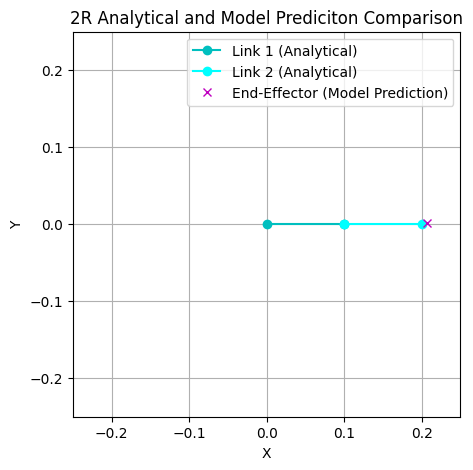

Distance error: 0.007251216391945589

Example with (j0, j1) = (1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.10824570804834366
End-effector predicted Y-position: 0.10317923128604889


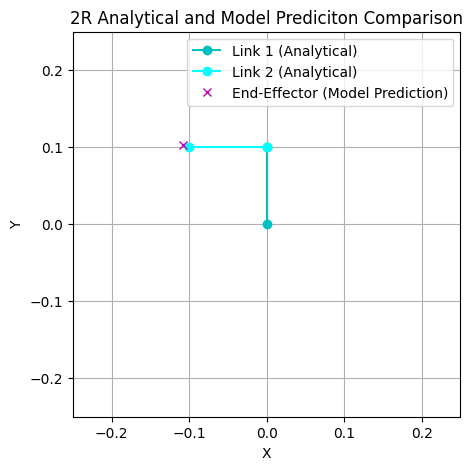

Distance error: 0.008837375899480074

Example with (j0, j1) = (1.5707963267948966, 0.7853981633974483)
End-effector predicted X-position: -0.08359342068433762
End-effector predicted Y-position: 0.1741837114095688


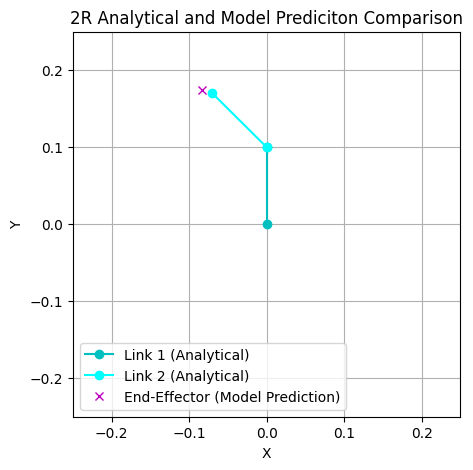

Distance error: 0.013342676502615742



In [124]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0), (np.pi/2, np.pi/2), (np.pi/2, np.pi/4)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_2R, theta, raw)
    print(f"Example with (j0, j1) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_2R, theta, raw)  
    dispFK_2R(result_model, theta, display_error=True)

In [125]:
theta = [np.pi/4, np.pi/2]  

learned_J = FK_Jacobian_pred(model_2R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_2R(theta)
print(f"Jacobian Matrix analytical:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.12037075 -0.08042573]
 [ 0.00470747 -0.07804948]]
Jacobian Matrix analytical:
[[-0.12037075 -0.08042573]
 [ 0.00470747 -0.07804948]]


### 2.2) 3R robot

Example with (j0, j1, j2) = (0, 0, 0)
End-effector predicted X-position: 0.2956540584564209
End-effector predicted Y-position: 0.01663082465529442


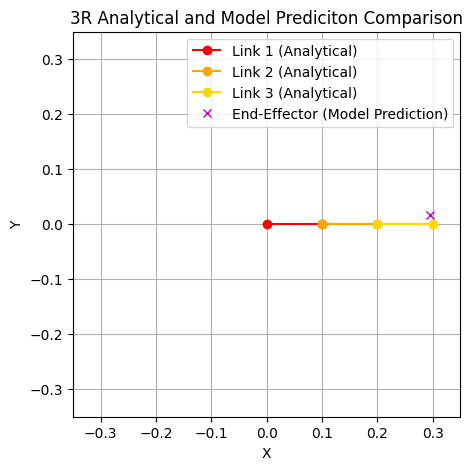

Distance error: 0.017189285517884557

Example with (j0, j1, j2) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483)
End-effector predicted X-position: -0.009309463202953339
End-effector predicted Y-position: 0.2277555763721466


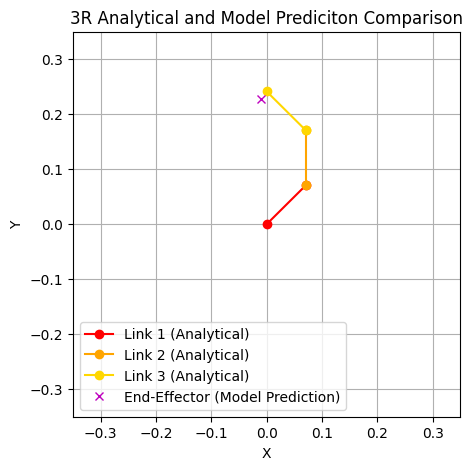

Distance error: 0.0165354057842629

Example with (j0, j1, j2) = (0, 1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.013440221548080444
End-effector predicted Y-position: 0.09400968253612518


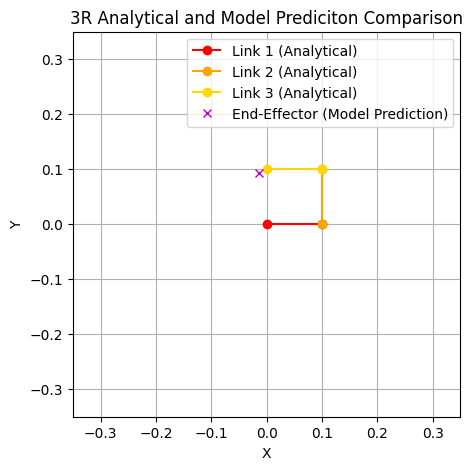

Distance error: 0.014714736102951006



In [126]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0), (np.pi/4, np.pi/4, np.pi/4), (0, np.pi/2, np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_3R, theta, raw)
    print(f"Example with (j0, j1, j2) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_3R, theta, raw)  
    dispFK_3R(result_model, theta, display_error=True)


In [127]:
theta = [np.pi/4, np.pi/5, np.pi/4]  

learned_J = FK_Jacobian_pred(model_3R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_3R(theta)
print(f"Jacobian Matrix analytical:\n{analytical_J}")


Jacobian Matrix predicted:
[[-0.1948474  -0.12357868 -0.04251285]
 [ 0.02092471 -0.09681182 -0.08253188]]
Jacobian Matrix analytical:
[[-0.25038121 -0.17967053 -0.0809017 ]
 [ 0.0275756  -0.04313508 -0.05877853]]


### 2.3) 5R robot

In [128]:
model_5R = MODELS_5R[0].model
name_5R = MODELS_5R[0].get_name()

if 'raw' in name_5R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0, 0, 0), (np.pi/4, np.pi/4, np.pi/4, np.pi/4, -np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred, ee_z_pred = FK(model_5R, theta, raw)
    print(f"Example with (j0, j1, j2, j3, j4) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    print(f"End-effector predicted Z-position: {ee_z_pred}")
    print("\n")

Example with (j0, j1, j2, j3, j4) = (0, 0, 0, 0, 0)
End-effector predicted X-position: 0.007317237555980682
End-effector predicted Y-position: -0.018210023641586304
End-effector predicted Z-position: 0.5810607075691223


Example with (j0, j1, j2, j3, j4) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, -1.5707963267948966)
End-effector predicted X-position: 0.08283671736717224
End-effector predicted Y-position: 0.2541939318180084
End-effector predicted Z-position: 0.04254215955734253




## III - Global Mean Absolute Error (MAE)

In [129]:
theta = [np.pi/4, np.pi/2, np.pi/4, np.pi/4, np.pi/4]  

learned_J = FK_Jacobian_pred(model_5R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.14267099 -0.15554637 -0.14440356 -0.10638666  0.03006017]
 [ 0.15012461 -0.07709827 -0.24219406 -0.17712946 -0.07731166]
 [ 0.00940621  0.00185391 -0.00762053  0.05133823  0.08233684]]


### 3.1) 2R robot

In [130]:
theta_values = np.linspace(0, 2*np.pi, 50)

for model in MODELS_2R:
    model_2R = model.model
    name_2R =  model.get_name()

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            theta = [j0, j1]

            learned_J = FK_Jacobian_pred(model_2R, theta, raw)
            analytical_J = FK_Jacobian_analytic_2R(theta)

            mae = (np.linalg.norm(learned_J - analytical_J))
            mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model: '{name_2R[:-6]}' Global MAE: {global_mae}")

Model: 'NN1_2R_p10_e20 copy' Global MAE: 0.032545335590839386
Model: 'NN1_2R_p10_e20' Global MAE: 0.032545335590839386


### 3.2) 3R robot

In [131]:
theta_values = np.linspace(0, 2*np.pi, 12)

for model in MODELS_3R:
    model_3R = model.model
    name_3R =  model.get_name()

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            for j2 in theta_values:
                theta = [j0, j1, j2]

                learned_J = FK_Jacobian_pred(model_3R, theta, raw)
                analytical_J = FK_Jacobian_analytic_3R(theta)

                mae = (np.linalg.norm(learned_J - analytical_J))
                mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model '{name_3R[:-6]}' Global MAE: {global_mae}")

Model 'NN1_3R_p10_e20' Global MAE: 0.19080160558223724
